Overview/Purpose:

This scripts reflects the preliminary step in our evaluation of rent control policy. It will use data sourced from the U.S. Census Bureau (Metropolitan and Micropolitan Statistical Area Population by Characteristics: 2020-2021: https://www.census.gov/data/tables/time-series/demo/popest/2020s-metro-and-micro-statistical-areas-detail.html)to match cities based on population and demographic composition. 

The goal of this data cleaning will be to select a city located in a state with rent control measures and match it with a city located in a state without rent control measures. This construction of a counterfactual will allow us to more meaningfully analyze the relationship between rent control policy and select variables. 


In [1]:
#import dependencies

!pip install itables #import itables for interactive data viewing prior to cleaning
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

import pandas as pd #import pandas for data analysis (dataframes, splitting columns, etc.)
import numpy as np #to match cities 
import matplotlib.pyplot as plt #import matplotlib for visualizations
import seaborn as sns #data viz


<IPython.core.display.Javascript object>

In [2]:
#read excel file containing data in need of analysis
raw_pop_data = pd.read_excel("Population_Age.xlsx", sheet_name= "cbsa-est2021-agesex")
raw_pop_data

SUMLEV   CBSA                                   NAME  \
0        310  35620  New York-Newark-Jersey City, NY-NJ-PA   
1        310  35620  New York-Newark-Jersey City, NY-NJ-PA   
2        310  35620  New York-Newark-Jersey City, NY-NJ-PA   
3        310  31080     Los Angeles-Long Beach-Anaheim, CA   
4        310  31080     Los Angeles-Long Beach-Anaheim, CA   
...      ...    ...                                    ...   
2776     310  46900                             Vernon, TX   
2777     310  46900                             Vernon, TX   
2778     310  29500                             Lamesa, TX   
2779     310  29500                             Lamesa, TX   
2780     310  29500                             Lamesa, TX   

                               LSAD  DATE  POPESTIMATE  POPEST_MALE  \
0     Metropolitan Statistical Area     1     20140470      9811780   
1     Metropolitan Statistical Area     2     20096413      9790685   
2     Metropolitan Statistical Area     3     19768458      9631925   
3     Metropolitan Statistical Area     1     13200998      6546539   
4     Metropolitan Statistical Area     2     13173266      6532871   
...                             ...   ...          ...          ...   
2776  Micropolitan Statistical Area     2        12846         6371   
2777  Micropolitan Statistical Area     3        12731         6303   
2778  Micropolitan Statistical Area     1        12456         6935   
2779  Micropolitan Statistical Area     2        12439         6934   
2780  Micropolitan Statistical Area     3        12413         6915   

      POPEST_FEMALE  UNDER5_TOTAL  UNDER5_MALE  ...  AGE7579_FEMALE  \
0          10328690       1196964       612112  ...          324666   
1          10305728       1186581       606835  ...          326269   
2          10136533       1134138       580036  ...          332691   
3           6654459        739410       378028  ...          182927   
4           6640395        729892       373326  ...          183986   
...             ...           ...          ...  ...             ...   
2776           6475           760          392  ...             259   
2777           6428           751          379  ...             261   
2778           5521           893          451  ...             212   
2779           5505           890          456  ...             213   
2780           5498           876          448  ...             214   

      AGE8084_TOTAL  AGE8084_MALE  AGE8084_FEMALE  AGE85PLUS_TOTAL  \
0            385868        155225          230643           421213   
1            386953        155677          231276           420039   
2            392545        157746          234799           417680   
3            220329         92540          127789           234207   
4            221030         92863          128167           233010   
...             ...           ...             ...              ...   
2776            278           124             154              288   
2777            296           135             161              270   
2778            242            96             146              209   
2779            237            95             142              209   
2780            237            96             141              205   

      AGE85PLUS_MALE  AGE85PLUS_FEMALE  MEDIAN_AGE_TOTAL  MEDIAN_AGE_MALE  \
0             143676            277537              39.0             37.8   
1             143406            276633              39.1             37.9   
2             143867            273813              39.5             38.3   
3              85152            149055              37.6             36.7   
4              84757            148253              37.7             36.7   
...              ...               ...               ...              ...   
2776              94               194              39.4             38.4   
2777              81               189              39.6             38.7   
2778              87 

In [3]:
#view columns contained within dataset to determine which will be needed
raw_pop_data.columns

Index(['SUMLEV', 'CBSA', 'NAME', 'LSAD', 'DATE', 'POPESTIMATE', 'POPEST_MALE',
       'POPEST_FEMALE', 'UNDER5_TOTAL', 'UNDER5_MALE', 'UNDER5_FEMALE',
       'AGE513_TOTAL', 'AGE513_MALE', 'AGE513_FEMALE', 'AGE1417_TOTAL',
       'AGE1417_MALE', 'AGE1417_FEMALE', 'AGE1824_TOTAL', 'AGE1824_MALE',
       'AGE1824_FEMALE', 'AGE16PLUS_TOTAL', 'AGE16PLUS_MALE',
       'AGE16PLUS_FEMALE', 'AGE18PLUS_TOTAL', 'AGE18PLUS_MALE',
       'AGE18PLUS_FEMALE', 'AGE1544_TOTAL', 'AGE1544_MALE', 'AGE1544_FEMALE',
       'AGE2544_TOTAL', 'AGE2544_MALE', 'AGE2544_FEMALE', 'AGE4564_TOTAL',
       'AGE4564_MALE', 'AGE4564_FEMALE', 'AGE65PLUS_TOTAL', 'AGE65PLUS_MALE',
       'AGE65PLUS_FEMALE', 'AGE04_TOTAL', 'AGE04_MALE', 'AGE04_FEMALE',
       'AGE59_TOTAL', 'AGE59_MALE', 'AGE59_FEMALE', 'AGE1014_TOTAL',
       'AGE1014_MALE', 'AGE1014_FEMALE', 'AGE1519_TOTAL', 'AGE1519_MALE',
       'AGE1519_FEMALE', 'AGE2024_TOTAL', 'AGE2024_MALE', 'AGE2024_FEMALE',
       'AGE2529_TOTAL', 'AGE2529_MALE', 'AGE2529_FEMALE

In [4]:
#drop first three time periods to isolate the latest data measures/points
raw_pop_data.drop(raw_pop_data[raw_pop_data['DATE'] < 3].index, inplace = True)
raw_pop_data.reset_index() #reset index
raw_pop_data 

SUMLEV   CBSA                                   NAME  \
2        310  35620  New York-Newark-Jersey City, NY-NJ-PA   
5        310  31080     Los Angeles-Long Beach-Anaheim, CA   
8        310  16980     Chicago-Naperville-Elgin, IL-IN-WI   
9        310  19100        Dallas-Fort Worth-Arlington, TX   
12       310  26420   Houston-The Woodlands-Sugar Land, TX   
...      ...    ...                                    ...   
2767     310  49820                             Zapata, TX   
2771     310  28540                          Ketchikan, AK   
2774     310  18780                              Craig, CO   
2777     310  46900                             Vernon, TX   
2780     310  29500                             Lamesa, TX   

                               LSAD  DATE  POPESTIMATE  POPEST_MALE  \
2     Metropolitan Statistical Area     3     19768458      9631925   
5     Metropolitan Statistical Area     3     12997353      6442147   
8     Metropolitan Statistical Area     3      9509934      4684813   
9     Metropolitan Statistical Area     3      7759615      3838383   
12    Metropolitan Statistical Area     3      7206841      3585680   
...                             ...   ...          ...          ...   
2767  Micropolitan Statistical Area     3        13908         6949   
2771  Micropolitan Statistical Area     3        13754         7068   
2774  Micropolitan Statistical Area     3        13185         6822   
2777  Micropolitan Statistical Area     3        12731         6303   
2780  Micropolitan Statistical Area     3        12413         6915   

      POPEST_FEMALE  UNDER5_TOTAL  UNDER5_MALE  ...  AGE7579_FEMALE  \
2          10136533       1134138       580036  ...          332691   
5           6555206        692442       353974  ...          188841   
8           4825121        531456       271155  ...          143273   
9           3921232        495281       253017  ...           88854   
12          3621161        480256       244461  ...           80118   
...             ...           ...          ...  ...             ...   
2767           6959          1061          545  ...             196   
2771           6686           655          336  ...             216   
2774           6363           753          376  ...             183   
2777           6428           751          379  ...             261   
2780           5498           876          448  ...             214   

      AGE8084_TOTAL  AGE8084_MALE  AGE8084_FEMALE  AGE85PLUS_TOTAL  \
2            392545        157746          234799           417680   
5            224804         94495          130309           232180   
8            163931         67003           96928           164468   
9             95139         39811           55328            81724   
12            85487         36485           49002            74000   
...             ...           ...             ...              ...   
2767            245           130             115              169   
2771            218           108             110              192   
2774            206           105             101              220   
2777            296           135             161              270   
2780            237            96             141              205   

      AGE85PLUS_MALE  AGE85PLUS_FEMALE  MEDIAN_AGE_TOTAL  MEDIAN_AGE_MALE  \
2             143867            273813              39.5             38.3   
5              84989            147191              38.1             37.2   
8              56496            107972              38.5             37.5   
9              29442             52282              35.5             34.9   
12             27177             46823              35.3             34.7   
...              ...               ...               ...              ...   
2767              74                95              30.7             28.6   
2771              76               116              40.6             40.4   
2774              77 

In [5]:
#Separate the City and State from the NAME column so that state can be isolated
#Isolation of state required since we are evaluating rent control on a statewide policy basis

raw_pop_data[['City','State']] = raw_pop_data['NAME'].str.split(',',expand=True)
raw_pop_data.columns

Index(['SUMLEV', 'CBSA', 'NAME', 'LSAD', 'DATE', 'POPESTIMATE', 'POPEST_MALE',
       'POPEST_FEMALE', 'UNDER5_TOTAL', 'UNDER5_MALE', 'UNDER5_FEMALE',
       'AGE513_TOTAL', 'AGE513_MALE', 'AGE513_FEMALE', 'AGE1417_TOTAL',
       'AGE1417_MALE', 'AGE1417_FEMALE', 'AGE1824_TOTAL', 'AGE1824_MALE',
       'AGE1824_FEMALE', 'AGE16PLUS_TOTAL', 'AGE16PLUS_MALE',
       'AGE16PLUS_FEMALE', 'AGE18PLUS_TOTAL', 'AGE18PLUS_MALE',
       'AGE18PLUS_FEMALE', 'AGE1544_TOTAL', 'AGE1544_MALE', 'AGE1544_FEMALE',
       'AGE2544_TOTAL', 'AGE2544_MALE', 'AGE2544_FEMALE', 'AGE4564_TOTAL',
       'AGE4564_MALE', 'AGE4564_FEMALE', 'AGE65PLUS_TOTAL', 'AGE65PLUS_MALE',
       'AGE65PLUS_FEMALE', 'AGE04_TOTAL', 'AGE04_MALE', 'AGE04_FEMALE',
       'AGE59_TOTAL', 'AGE59_MALE', 'AGE59_FEMALE', 'AGE1014_TOTAL',
       'AGE1014_MALE', 'AGE1014_FEMALE', 'AGE1519_TOTAL', 'AGE1519_MALE',
       'AGE1519_FEMALE', 'AGE2024_TOTAL', 'AGE2024_MALE', 'AGE2024_FEMALE',
       'AGE2529_TOTAL', 'AGE2529_MALE', 'AGE2529_FEMALE

In [6]:
#create dataframe for city matching (cm) that isolates factors/measures we wish to compare
#This includes the city, state, total population, male population, femal population, and median age
cm= raw_pop_data[['CBSA','City', 'State', 'POPESTIMATE', 'POPEST_MALE','POPEST_FEMALE','MEDIAN_AGE_TOTAL']]
cm.reset_index() 
cm

CBSA                              City      State  POPESTIMATE  \
2     35620       New York-Newark-Jersey City   NY-NJ-PA     19768458   
5     31080    Los Angeles-Long Beach-Anaheim         CA     12997353   
8     16980          Chicago-Naperville-Elgin   IL-IN-WI      9509934   
9     19100       Dallas-Fort Worth-Arlington         TX      7759615   
12    26420  Houston-The Woodlands-Sugar Land         TX      7206841   
...     ...                               ...        ...          ...   
2767  49820                            Zapata         TX        13908   
2771  28540                         Ketchikan         AK        13754   
2774  18780                             Craig         CO        13185   
2777  46900                            Vernon         TX        12731   
2780  29500                            Lamesa         TX        12413   

      POPEST_MALE  POPEST_FEMALE  MEDIAN_AGE_TOTAL  
2         9631925       10136533              39.5  
5         6442147        6555206              38.1  
8         4684813        4825121              38.5  
9         3838383        3921232              35.5  
12        3585680        3621161              35.3  
...           ...            ...               ...  
2767         6949           6959              30.7  
2771         7068           6686              40.6  
2774         6822           6363              38.6  
2777         6303           6428              39.6  
2780         6915           5498              33.5  

[927 rows x 7 columns]

In [7]:
cm.describe() #note the large variation in min and max population values

CBSA   POPESTIMATE   POPEST_MALE  POPEST_FEMALE  \
count    927.000000  9.270000e+02  9.270000e+02   9.270000e+02   
mean   29804.861920  3.386110e+05  1.674841e+05   1.711270e+05   
std    11370.402684  1.118715e+06  5.500374e+05   5.687470e+05   
min    10100.000000  1.241300e+04  6.303000e+03   5.498000e+03   
25%    20040.000000  3.937800e+04  1.983900e+04   1.948700e+04   
50%    29780.000000  7.495400e+04  3.737700e+04   3.736800e+04   
75%    39560.000000  1.904085e+05  9.382950e+04   9.551550e+04   
max    49820.000000  1.976846e+07  9.631925e+06   1.013653e+07   

       MEDIAN_AGE_TOTAL  
count        927.000000  
mean          39.672384  
std            4.802042  
min           24.700000  
25%           37.200000  
50%           39.700000  
75%           42.000000  
max           68.300000

In [8]:
tp_match_city = [] #create list that will hold city and state name of nearest match
tp_match_city_popdiff = [] #create list that will hold abs value of population diff between city and match city
male_pop_mc = [] #list that will contain male population of match city
female_pop_mc = [] #list that will contain female population of match city
median_age_mc = [] #list that will contain median age of match city


#take popestimate value in a row, compare to all others, find closest match using abs value and min
for i, row in cm.iterrows():
    diff = np.abs(cm.drop(i)['POPESTIMATE']-cm['POPESTIMATE'][i]) #use the drop to not compare it to itself
    idx = diff.argmin()#return indices of min values along an axis
    min_diff = diff.min() #get value of min value
    
#Once closest match city (in terms of total population) is located:
#Append total pop match city list with city and state name (use index to locate)
#Append match city population diff list with abs value diff    
    tp_match_city.append((cm.drop(i).iloc[idx]['City'],cm.drop(i).iloc[idx]['State']))
    tp_match_city_popdiff.append(min_diff)
    male_pop_mc.append(cm.drop(i).iloc[idx]['POPEST_MALE'])
    female_pop_mc.append(cm.drop(i).iloc[idx]['POPEST_FEMALE'])
    median_age_mc.append(cm.drop(i).iloc[idx]['MEDIAN_AGE_TOTAL'])
    

In [9]:
#create dataframe with new columns containing data for "match city"
newdf = pd.DataFrame({
    "City": cm['City'], 
    "State": cm['State'], 
    "Total Pop": cm['POPESTIMATE'], 
    "Male Pop": cm['POPEST_MALE'],
    "Female Pop": cm['POPEST_FEMALE'],
    "Median Age": cm['MEDIAN_AGE_TOTAL'],
    "Match City": tp_match_city,
    "Match City Diff in Total Pop": tp_match_city_popdiff,
    "Match City Male Pop": male_pop_mc,
    "Match City Female Pop": female_pop_mc,
    "Match City Median Age": median_age_mc
})

newdf #see new df

City      State  Total Pop  Male Pop  \
2          New York-Newark-Jersey City   NY-NJ-PA   19768458   9631925   
5       Los Angeles-Long Beach-Anaheim         CA   12997353   6442147   
8             Chicago-Naperville-Elgin   IL-IN-WI    9509934   4684813   
9          Dallas-Fort Worth-Arlington         TX    7759615   3838383   
12    Houston-The Woodlands-Sugar Land         TX    7206841   3585680   
...                                ...        ...        ...       ...   
2767                            Zapata         TX      13908      6949   
2771                         Ketchikan         AK      13754      7068   
2774                             Craig         CO      13185      6822   
2777                            Vernon         TX      12731      6303   
2780                            Lamesa         TX      12413      6915   

      Female Pop  Median Age                               Match City  \
2       10136533        39.5    (Los Angeles-Long Beach-Anaheim,  CA)   
5        6555206        38.1    (Chicago-Naperville-Elgin,  IL-IN-WI)   
8        4825121        38.5       (Dallas-Fort Worth-Arlington,  TX)   
9        3921232        35.5  (Houston-The Woodlands-Sugar Land,  TX)   
12       3621161        35.3       (Dallas-Fort Worth-Arlington,  TX)   
...          ...         ...                                      ...   
2767        6959        30.7                         (Ketchikan,  AK)   
2771        6686        40.6                            (Zapata,  TX)   
2774        6363        38.6                            (Vernon,  TX)   
2777        6428        39.6                            (Lamesa,  TX)   
2780        5498        33.5                            (Vernon,  TX)   

      Match City Diff in Total Pop  Match City Male Pop  \
2                          6771105              6442147   
5                          3487419              4684813   
8                          1750319              3838383   
9                           552774              3585680   
12                          552774              3838383   
...                            ...                  ...   
2767                           154                 7068   
2771                           154                 6949   
2774                           454                 6303   
2777                           318                 6915   
2780                           318                 6303   

      Match City Female Pop  Match City Median Age  
2                   6555206                   38.1  
5                   4825121                   38.5  
8                   3921232                   35.5  
9                   3621161                   35.3  
12                  3921232                   35.5  
...                     ...                    ...  
2767                   6686                   40.6  
2771                   6959                   30.7  
2774                   6428                   39.6  
2777                   5498                   33.5  
2780                   6428                   39.6  

[927 rows x 11 columns]

In [10]:
#calculate the difference (abs value) between male/female population and median age across matched cities
#add the calculated differences (and difference in total population) to determine overall level of difference
newdf["Diff in Male Pop"] = abs((newdf['Male Pop'] - newdf["Match City Male Pop"]))
newdf["Diff in Female Pop"] = abs((newdf['Female Pop'] - newdf["Match City Female Pop"]))    
newdf["Diff in Median Age"] = abs((newdf['Median Age'] - newdf["Match City Median Age"]))    
newdf["Total Difference"] = (newdf["Match City Diff in Total Pop"]+ newdf["Diff in Male Pop"] + newdf["Diff in Female Pop"] + newdf["Diff in Median Age"])

newdf["Total Difference"].argmin()
newdf.sort_values(by='Total Difference', ascending=True)


City      State  Total Pop  Male Pop  \
1883                         Paragould         AR      46317     22882   
1884                          Cortland         NY      46311     22852   
2285                           Emporia         KS      34596     17004   
2469                          Bluffton         IN      28197     14062   
2474                       Weatherford         OK      28163     14064   
...                                ...        ...        ...       ...   
12    Houston-The Woodlands-Sugar Land         TX    7206841   3585680   
9          Dallas-Fort Worth-Arlington         TX    7759615   3838383   
8             Chicago-Naperville-Elgin   IL-IN-WI    9509934   4684813   
5       Los Angeles-Long Beach-Anaheim         CA   12997353   6442147   
2          New York-Newark-Jersey City   NY-NJ-PA   19768458   9631925   

      Female Pop  Median Age                               Match City  \
1883       23435        38.3                          (Cortland,  NY)   
1884       23459        36.8                         (Paragould,  AR)   
2285       17592        34.4                              (Taos,  NM)   
2469       14135        40.0                       (Weatherford,  OK)   
2474       14099        31.6                          (Bluffton,  IN)   
...          ...         ...                                      ...   
12       3621161        35.3       (Dallas-Fort Worth-Arlington,  TX)   
9        3921232        35.5  (Houston-The Woodlands-Sugar Land,  TX)   
8        4825121        38.5       (Dallas-Fort Worth-Arlington,  TX)   
5        6555206        38.1    (Chicago-Naperville-Elgin,  IL-IN-WI)   
2       10136533        39.5    (Los Angeles-Long Beach-Anaheim,  CA)   

      Match City Diff in Total Pop  Match City Male Pop  \
1883                             6                22852   
1884                             6                22882   
2285                            27                17034   
2469                            34                14064   
2474                            34                14062   
...                            ...                  ...   
12                          552774              3838383   
9                           552774              3585680   
8                          1750319              3838383   
5                          3487419              4684813   
2                          6771105              6442147   

      Match City Female Pop  Match City Median Age  Diff in Male Pop  \
1883                  23459                   36.8                30   
1884                  23435                   38.3                30   
2285                  17589                   50.2                30   
2469                  14099                   31.6                 2   
2474                  14135                   40.0                 2   
...                     ...                    ...               ...   
12                  3921232                   35.5            252703   
9                   3621161                   35.3            252703   
8                   3921232                   35.5            846430   
5                   4825121                   38.5           1757334   
2                   6555206                   38.1           3189778   

      Diff in Female Pop  Diff in Median Age  Total Difference  
1883                  24                 1.5              61.5  
1884                  24                 1.5              61.5  
2285                   3                15.8              75.8  
2469                  36                 8.4              80.4  
2474                  36                 8.4              80.4  
...                  ...                 ...               ...  
12                300071                 0.2         1105548.2  
9                 300071                 0.2         1105548.2  
8                 903889                 3.0         3500641.0  
5                1730085                 0.4

The above output shows that the most similar cities are Paragould, Arkansas and Courtland, NY. 

Something to consider when reviewing this data is that smaller cities may yield smaller numerical differences due to their relative size (which range from a total population of 12,413 to 19,768,460. There could be multiple ways to circumvent this potential issue. For example, we could create tiers/bins for city sizes, or produce another solution. Additionally, we need to ensure that we are only searching for matches between states with and without rent control measures.

We decided to narrow our parameters by selected the states we wished to compare, and later restricted our analysis to the top 10 largest cities in those states.

Our group decided to isolate Texas as the state we wished to analyze with regard to its lack of rent control measures. Texas preempts both mandatory inclusionary zonings and rent control.

California was selected as the state within which we wished to locate a counterfactual. This is because California is the only state that has statewide rent control caps in addition to city specific laws.

In [11]:
#create list of states representing the states we wish to select (CA and TX) 

#create list of CBSA numbers used to identify CA and TX cities
ss = [31080, 40140, 41860, 41740, 40900, 41940, 23420, 12540, 37100, 44700, 33700, 42220, 47300, 46700, 42200, 41500, 32900, 42020, 42100, 17020, 49700, 39820, 20940, 31460, 25260, 21700, 34900, 46020, 46380, 17340, 39780, 43760, 45000, 18860, 19100, 26420, 41700, 12420, 32580, 21340, 28660, 15180, 18580, 13140, 31180, 30980, 47380, 17780, 11100, 29700, 46340, 10180, 33260, 36220, 48660, 43300, 41660, 47020, 31260, 11980, 26660, 40100, 34860, 24180, 37300, 20580, 18620, 28500, 27380, 37580, 10860, 19620, 34420, 44500, 23620, 20900, 15220, 44860, 14300, 13060, 14780, 13700, 38380, 28780, 13300, 33420, 23240, 46620, 40530, 37420, 30220, 20300, 14420, 39700, 38920, 11380, 37770, 25820, 43660, 45020, 37780, 49820, 46900, 29500, 45500]

#create lists to hold city, state, pop, and age information
cty = []
ste = []
pop = []
mpop = []
fpop = []
medage = []

#iterate through raw pop df to pull only TX and CA data. Change datatype to values to remove name and dtype 
for selected in ss:
    i = raw_pop_data.loc[raw_pop_data["CBSA"] == selected] #state is TX or CA
    c = i["City"].values #had to use .values method to prevent "name" and "dtype" from carrying over to df built below
    s = i["State"].values
    p = i["POPESTIMATE"].values
    m = i["POPEST_MALE"].values
    f = i["POPEST_FEMALE"].values
    mm = i["MEDIAN_AGE_TOTAL"].values
    cty.append(c)
    ste.append(s)
    pop.append(p)
    mpop.append(m)
    fpop.append(f)
    medage.append(mm)



In [12]:
#create df containing data for selected states
ssdf = pd.DataFrame({
    "City": cty, 
    "State": ste, 
    "Total Pop": pop, 
    "Male Pop": mpop,
    "Female Pop": fpop,
    "Median Age": medage,  
})

ssdf = ssdf.astype({"Total Pop":"int", "Male Pop":"int","Female Pop":"int","Median Age":"int"})
#change datatype to integers for later calculations


ssdf

City     State  Total Pop  Male Pop  \
0      [Los Angeles-Long Beach-Anaheim]     [ CA]   12997353   6442147   
1    [Riverside-San Bernardino-Ontario]     [ CA]    4653105   2333233   
2      [San Francisco-Oakland-Berkeley]     [ CA]    4623264   2300643   
3      [San Diego-Chula Vista-Carlsbad]     [ CA]    3286069   1664962   
4         [Sacramento-Roseville-Folsom]     [ CA]    2411428   1187091   
..                                  ...       ...        ...       ...   
100                             [Pecos]     [ TX]      14544      8861   
101                            [Zapata]     [ TX]      13908      6949   
102                            [Vernon]     [ TX]      12731      6303   
103                            [Lamesa]     [ TX]      12413      6915   
104                         [Texarkana]  [ TX-AR]     147174     73624   

     Female Pop  Median Age  
0       6555206          38  
1       2319872          35  
2       2322621          40  
3       1621107          36  
4       1224337          38  
..          ...         ...  
100        5683          33  
101        6959          30  
102        6428          39  
103        5498          33  
104       73550          38  

[105 rows x 6 columns]

In [13]:
ssdf.describe()
#Per this chart, only 25% of the MSAs in TX and CA are above a population of 325,245
#This is also shown by below quartile calcs
#To isolate the largest MSAs, we will drop all MSAs below 90th percentile range from dataframe

Total Pop      Male Pop    Female Pop  Median Age
count  1.050000e+02  1.050000e+02  1.050000e+02  105.000000
mean   6.398298e+05  3.194284e+05  3.204014e+05   36.352381
std    1.759562e+06  8.738032e+05  8.857968e+05    4.605559
min    1.241300e+04  6.303000e+03  5.498000e+03   28.000000
25%    3.634400e+04  1.901900e+04  1.807200e+04   33.000000
50%    9.812700e+04  4.834500e+04  4.978200e+04   36.000000
75%    3.252450e+05  1.608550e+05  1.643900e+05   39.000000
max    1.299735e+07  6.442147e+06  6.555206e+06   50.000000

In [14]:
#see below quartile calcs
quartile = ssdf["Total Pop"].quantile([.25,.75,.90])#25, 75, and 90th percentiles
lowerq = quartile[.25] #25th percentile
upperq = quartile[.75] #75th percentile
above90percent = quartile[.90] #90th percentile

#90% of cities within CA and TX have a population below 975,217.8

In [15]:
#drop the bottom 90% of cities (keep 10 largest)
ssdf.drop(ssdf[ssdf["Total Pop"] < 975217].index,inplace = True)
ssdf

City  State  Total Pop  Male Pop  \
0     [Los Angeles-Long Beach-Anaheim]  [ CA]   12997353   6442147   
1   [Riverside-San Bernardino-Ontario]  [ CA]    4653105   2333233   
2     [San Francisco-Oakland-Berkeley]  [ CA]    4623264   2300643   
3     [San Diego-Chula Vista-Carlsbad]  [ CA]    3286069   1664962   
4        [Sacramento-Roseville-Folsom]  [ CA]    2411428   1187091   
5     [San Jose-Sunnyvale-Santa Clara]  [ CA]    1952185    994095   
6                             [Fresno]  [ CA]    1013581    508597   
34       [Dallas-Fort Worth-Arlington]  [ TX]    7759615   3838383   
35  [Houston-The Woodlands-Sugar Land]  [ TX]    7206841   3585680   
36         [San Antonio-New Braunfels]  [ TX]    2601788   1293174   
37      [Austin-Round Rock-Georgetown]  [ TX]    2352426   1185819   

    Female Pop  Median Age  
0      6555206          38  
1      2319872          35  
2      2322621          40  
3      1621107          36  
4      1224337          38  
5       958090          38  
6       504984          33  
34     3921232          35  
35     3621161          35  
36     1308614          35  
37     1166607          35

In [16]:
mc = [] #create list that will hold city and state name of nearest match
mc_popdiff = [] #create list that will hold abs value of population diff between city and match city
mc_mpop = [] #list that will contain male population of match city
mc_fpop = [] #list that will contain female population of match city
mc_median= [] #list that will contain median age of match city


#take popestimate value in a row, compare to all others, find closest match using abs value and min
for i, row in ssdf.iterrows():
    difference = np.abs(ssdf.drop(i)['Total Pop']- ssdf['Total Pop'][i]) #use the drop to not compare it to itself
    idx = difference.argmin()#return indices of min values along an axis
    min_diff = difference.min() #get value of min value
    
#Once closest match city (in terms of total population) is located:
#Append total pop match city list with city and state name (use index to locate)
#Append match city population diff list with abs value diff    
    mc.append((ssdf.drop(i).iloc[idx]['City'],ssdf.drop(i).iloc[idx]['State']))
    mc_popdiff.append(min_diff)
    mc_mpop.append(ssdf.drop(i).iloc[idx]['Male Pop'])
    mc_fpop.append(ssdf.drop(i).iloc[idx]['Female Pop'])
    mc_median.append(ssdf.drop(i).iloc[idx]['Median Age'])

    
#create dataframe with new match ciy columns
finaldf = pd.DataFrame({
    "City": ssdf['City'], 
    "State": ssdf['State'], 
    "Total Pop": ssdf['Total Pop'], 
    "Male Pop": ssdf['Male Pop'],
    "Female Pop": ssdf['Female Pop'],
    "Median Age": ssdf['Median Age'],
    "Match City": mc,
    "Match City Diff in Total Pop": mc_popdiff,
    "Match City Male Pop": mc_mpop,
    "Match City Female Pop": mc_fpop,
    "Match City Median Age": mc_median
})


finaldf["Diff in Male Pop"] = abs((finaldf['Male Pop'] - finaldf["Match City Male Pop"]))
finaldf["Diff in Female Pop"] = abs((finaldf['Female Pop'] - finaldf["Match City Female Pop"]))    
finaldf["Diff in Median Age"] = abs((finaldf['Median Age'] - finaldf["Match City Median Age"]))    
finaldf["Total Difference"] = (finaldf["Match City Diff in Total Pop"]+ finaldf["Diff in Male Pop"] + finaldf["Diff in Female Pop"] + finaldf["Diff in Median Age"])

finaldf["Total Difference"].argmin()
finaldf.sort_values(by='Total Difference', ascending=True)


#Per below output, the first closest match MSAs within Texas and California are:
#Sacramento-Roseville-Folsom and Austin-Round Rock-Georgetown


City  State  Total Pop  Male Pop  \
1   [Riverside-San Bernardino-Ontario]  [ CA]    4653105   2333233   
2     [San Francisco-Oakland-Berkeley]  [ CA]    4623264   2300643   
4        [Sacramento-Roseville-Folsom]  [ CA]    2411428   1187091   
37      [Austin-Round Rock-Georgetown]  [ TX]    2352426   1185819   
36         [San Antonio-New Braunfels]  [ TX]    2601788   1293174   
5     [San Jose-Sunnyvale-Santa Clara]  [ CA]    1952185    994095   
34       [Dallas-Fort Worth-Arlington]  [ TX]    7759615   3838383   
35  [Houston-The Woodlands-Sugar Land]  [ TX]    7206841   3585680   
3     [San Diego-Chula Vista-Carlsbad]  [ CA]    3286069   1664962   
6                             [Fresno]  [ CA]    1013581    508597   
0     [Los Angeles-Long Beach-Anaheim]  [ CA]   12997353   6442147   

    Female Pop  Median Age                                   Match City  \
1      2319872          35    ([San Francisco-Oakland-Berkeley], [ CA])   
2      2322621          40  ([Riverside-San Bernardino-Ontario], [ CA])   
4      1224337          38      ([Austin-Round Rock-Georgetown], [ TX])   
37     1166607          35       ([Sacramento-Roseville-Folsom], [ CA])   
36     1308614          35       ([Sacramento-Roseville-Folsom], [ CA])   
5       958090          38      ([Austin-Round Rock-Georgetown], [ TX])   
34     3921232          35  ([Houston-The Woodlands-Sugar Land], [ TX])   
35     3621161          35       ([Dallas-Fort Worth-Arlington], [ TX])   
3      1621107          36         ([San Antonio-New Braunfels], [ TX])   
6       504984          33    ([San Jose-Sunnyvale-Santa Clara], [ CA])   
0      6555206          38       ([Dallas-Fort Worth-Arlington], [ TX])   

    Match City Diff in Total Pop  Match City Male Pop  Match City Female Pop  \
1                          29841              2300643                2322621   
2                          29841              2333233                2319872   
4                          59002              1185819                1166607   
37                         59002              1187091                1224337   
36                        190360              1187091                1224337   
5                         400241              1185819                1166607   
34                        552774              3585680                3621161   
35                        552774              3838383                3921232   
3                         684281              1293174                1308614   
6                         938604               994095                 958090   
0                        5237738              3838383                3921232   

    Match City Median Age  Diff in Male Pop  Diff in Female Pop  \
1                      40             32590                2749   
2                      35             32590                2749   
4                      35              1272               57730   
37                     38              1272               57730   
36                     38            106083               84277   
5                      35            191724              208517   
34                     35            252703              300071   
35                     35            252703              300071   
3                      35            371788              312493   
6                      38            485498              453106   
0                      35           2603764             2633974   

    Diff in Median Age  Total Difference  
1                    5             65185  
2                    5             65185  
4                    3            118007  
37                   3            118007  
36                   3            380723  
5                    3            800485  
34                   0           1105548  
35                   0           1105548  
3                    1           1368563  
6                    5           1877213  
0                    3          10475479

In [17]:
#isolate two selected cities from city matching

matches = finaldf.loc[(finaldf['City'] == "Sacramento-Roseville-Folsom") | (finaldf['City'] == "Austin-Round Rock-Georgetown")]
matches


City  State  Total Pop  Male Pop  Female Pop  \
4    [Sacramento-Roseville-Folsom]  [ CA]    2411428   1187091     1224337   
37  [Austin-Round Rock-Georgetown]  [ TX]    2352426   1185819     1166607   

    Median Age                               Match City  \
4           38  ([Austin-Round Rock-Georgetown], [ TX])   
37          35   ([Sacramento-Roseville-Folsom], [ CA])   

    Match City Diff in Total Pop  Match City Male Pop  Match City Female Pop  \
4                          59002              1185819                1166607   
37                         59002              1187091                1224337   

    Match City Median Age  Diff in Male Pop  Diff in Female Pop  \
4                      35              1272               57730   
37                     38              1272               57730   

    Diff in Median Age  Total Difference  
4                    3            118007  
37                   3            118007

In [18]:
#set styles for all graphics (font size, font type, color palette, style)

sns.set_style('whitegrid') #set background style
    
plt.rc('axes', labelsize=13)  #set fontsize of x and y labels
plt.rc('xtick', labelsize=10) #set fontsize of the xtick labels
plt.rc('ytick', labelsize=10) #set fontsize of the ytick labels
plt.rc('legend', fontsize=12) #set legend fontsize
plt.rc('axes', titlesize=17)  #set fontsize of the axes title
plt.rc('font', size=12) # set default text size

sns.color_palette("Blues") #setting color palette for all of matplotlib

plt.rcParams['font.sans-serif']="Avenir" #set font to Avenir
plt.rcParams["axes.formatter.useoffset"]=False

sns.color_palette("Blues")

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

<Figure size 800x400 with 0 Axes>

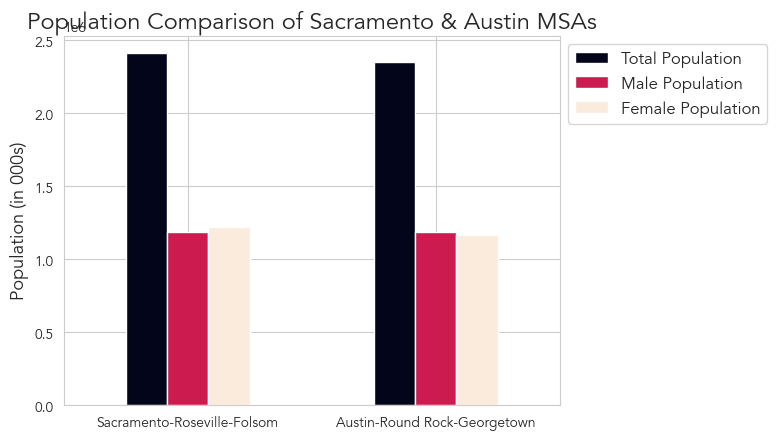

In [19]:
#create stacked bar chart with two cities
core = pd.DataFrame({
    "Cities": ["Sacramento-Roseville-Folsom", "Austin-Round Rock-Georgetown"],
    "Total Population": [2411428, 2352426],
    "Male Population": [1187091, 1185819],
    "Female Population": [1224337, 1166607]   
})

plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette("Blues")

core.plot(x='Cities',
        kind='bar',
        stacked=False,
        title='Population Comparison of Sacramento & Austin MSAs',
        xlabel="",#removing x-axis label
        ylabel="Population (in 000s)",
        legend='left',
        colormap='rocket') #changing color using seaborn

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.xticks(rotation=0) #changing orientation of x-axis labels 
plt.show()

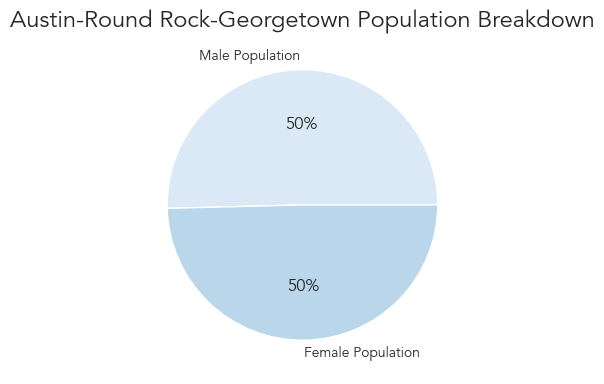

In [20]:
austin = finaldf.loc[(finaldf['City'] == "Austin-Round Rock-Georgetown")]

austin_pop = pd.Series(austin["Total Pop"].values)

austin_mpop = pd.Series(austin["Male Pop"].values)

austin_fpop = pd.Series(austin["Female Pop"].values)

austin_medi = pd.Series(austin["Median Age"].values)

labels = ["Male Population","Female Population"]
austin_data = pd.Series([austin_mpop, austin_fpop])

plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette("Blues")

plt.pie(austin_data, labels=labels, autopct="%1.0f%%", colors=colors[:5])
plt.title("Austin-Round Rock-Georgetown Population Breakdown", fontname="Avenir")
plt.show()

Text(0.5, 1.0, 'Sacramento-Roseville-Folsom Population Breakdown')

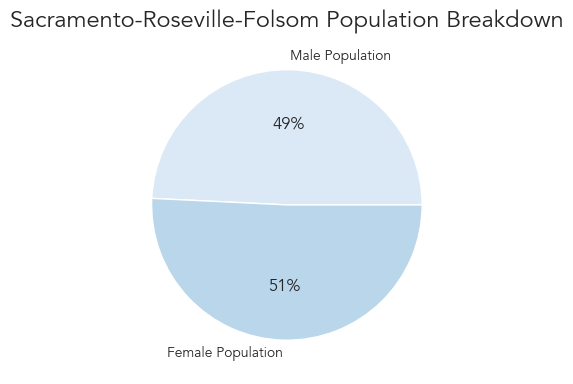

In [21]:
sacramento = finaldf.loc[(finaldf['City'] == "Sacramento-Roseville-Folsom")]

sacramento_pop = pd.Series(sacramento["Total Pop"].values)

sacramento_mpop = pd.Series(sacramento["Male Pop"].values)

sacramento_fpop = pd.Series(sacramento["Female Pop"].values)

sacramento_medi = pd.Series(sacramento["Median Age"].values)

labels = ["Male Population","Female Population"]
sacramento_data = pd.Series([sacramento_mpop, sacramento_fpop])
#sacramento_data.set_xlabel("Male Population", fontname="Avenir")

plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette("Blues")

plt.pie(sacramento_data, labels=labels, autopct="%1.0f%%", colors=colors[:5])
plt.title("Sacramento-Roseville-Folsom Population Breakdown")
